In [62]:
import os

import umap
import umap.plot
import requests
import pandas as pd
import numpy as np
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
from mnist.loader import MNIST

In [3]:
import cudf
import cuml

In [15]:
print("Fetching Fashion-Mnist")
print("=========================")
mndata = MNIST('../fashion-mnist/data/fashion') #added path extension for new file structure
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser', 
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']
print("Fashion-Mnist loaded")
print ("=========================")

Fetching Fashion-Mnist
Fashion-Mnist loaded


In [50]:
neighbors=15
dim=2
epochs=500
dist=.2
seed=42

In [51]:
%%time
reducer = cuml.UMAP(
    n_neighbors=neighbors,
    n_components=dim,
    n_epochs=epochs,
    min_dist=dist,
    verbose=1,
    random_state=seed
)
control_embedding_2d = reducer.fit_transform(data)

CPU times: user 2.83 s, sys: 108 ms, total: 2.94 s
Wall time: 2.93 s


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP')

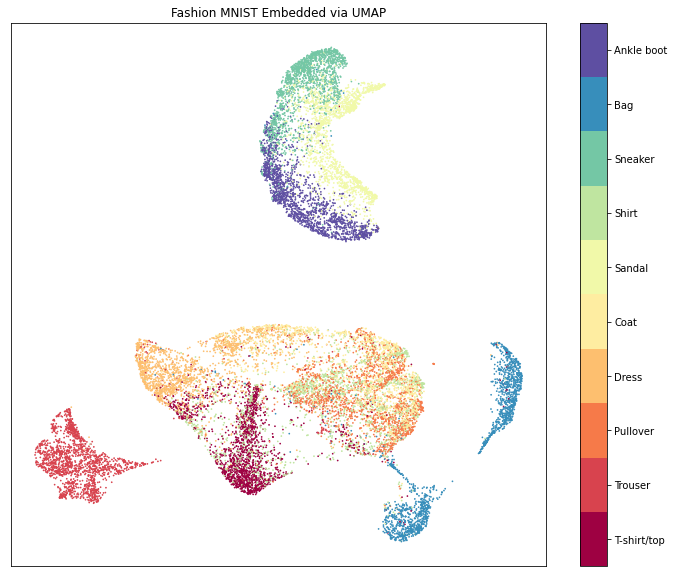

In [60]:
#Pd config
#-------------------------------------------------
df = pd.DataFrame(control_embedding_2d, columns=('x', 'y'))
df['class'] = pd.Series([str(x) for x in target], dtype="category")

#Plot config
#-------------------------------------------------
fig, ax = plt.subplots(1, figsize=(12, 10))
plt.scatter(
    df_sample["y"].values,df_sample["x"].values,  
    c=df_sample["class"].astype("int"), s=0.5, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

#Color Bar
#--------------------------------------------------
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
                        
#Title
#--------------------------------------------------
plt.title('Fashion MNIST Embedded via UMAP')

In [111]:
%%time
reducer = cuml.UMAP(
    n_neighbors=neighbors,
    n_components=dim,
    n_epochs=epochs,
    min_dist=dist,
    verbose=1,
    random_state=seed
)
control_embedding_2d = reducer.fit(data)

CPU times: user 2.85 s, sys: 79.8 ms, total: 2.93 s
Wall time: 2.93 s


In [120]:
gmapper = cuml.UMAP(n_neighbors=neighbors,
    n_components=dim,
    n_epochs=epochs,
    min_dist=dist,
    verbose=1,
    random_state=seed).fit(data)
umap.plot.points(gmapper) # plots the image

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [118]:
import cupy as cp
type(control_embedding_2d) #cuml.manifold.umap.UMAP

#control_embedding_2d.embedding_ = control_embedding_2d.embedding_.to_output('numpy')
##mapper2.metric = 'euclidean' # this is to avoid a warning, as of today, cuml does not support other metric
#control_embedding_2d=cupy.asnumpy(control_embedding_2d)
#type(control_embedding_2d)
c=control_embedding_2d.manifold.umap.umap_.UMAP
umap.plot.connectivity(c, show_points=True)

AttributeError: manifold

In [7]:
!pwd

/home/921642160/FALL 2022 UMAP 
